<a href="https://colab.research.google.com/github/leoniedyt/Project-DSML/blob/Project_dsml/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df_interactions_train = pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/interactions_train.csv')
display(df_interactions_train.head())

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


In [4]:
df_items = pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/items.csv')
display(df_items.head())

,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [5]:
df_submissions= pd.read_csv('https://raw.githubusercontent.com/leoniedyt/Project-DSML/refs/heads/Project_dsml/Data/sample_submission.csv')
display(df_submissions.head())

,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


# 1. Data cleaning:

In [6]:
# Vérifier les doublons dans les interactions
print("Nombre de doublons dans les interactions :", df_interactions_train.duplicated().sum())

# Conversion du timestamp en datetime (si ce n'est pas déjà fait dans l'analyse temporelle)
df_interactions_train['datetime'] = pd.to_datetime(df_interactions_train['t'], unit='s')

# Supprimer la colonne 't' si la colonne datetime est utilisée par la suite
df_interactions_train.drop(columns=['t'], inplace=True)

Nombre de doublons dans les interactions : 2


In [7]:
# Supprimer les doublons dans les données d'interactions
df_interactions_train.drop_duplicates(inplace=True)

# Vérifier à nouveau pour s'assurer qu'il ne reste plus de doublons
print("Nombre de doublons après nettoyage :", df_interactions_train.duplicated().sum())

Nombre de doublons après nettoyage : 0


Verification des valeurs manquantes

In [8]:
# Vérifier les valeurs manquantes dans le dataset des interactions
print("Valeurs manquantes dans les données d'interactions :")
print(df_interactions_train.isnull().sum())

# Vérifier les valeurs manquantes dans le dataset des items
print("\nValeurs manquantes dans les données des items :")
print(df_items.isnull().sum())

# Vérifier les valeurs manquantes dans le dataset de soumission
print("\nValeurs manquantes dans les données de soumission :")
print(df_submissions.isnull().sum())

Valeurs manquantes dans les données d'interactions :
u           0
i           0
datetime    0
dtype: int64

Valeurs manquantes dans les données des items :
Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

Valeurs manquantes dans les données de soumission :
user_id           0
recommendation    0
dtype: int64


In [9]:
# Remplacer les valeurs manquantes dans les colonnes avec des valeurs par défaut sans utiliser inplace=True
df_items = df_items.fillna({
    'Author': "Auteur inconnu",
    'ISBN Valid': "ISBN manquant",
    'Publisher': "Éditeur inconnu",
    'Subjects': "Sujet inconnu"
})

# Vérification pour s'assurer qu'il ne reste plus de valeurs manquantes
print("Valeurs manquantes après nettoyage des items :")
print(df_items.isnull().sum())

Valeurs manquantes après nettoyage des items :
Title         0
Author        0
ISBN Valid    0
Publisher     0
Subjects      0
i             0
dtype: int64


Vérification des données avant de passer à l'exploration:

In [10]:
# Vérifier les informations finales des datasets
print("\nInformations finales des datasets :")
print("Interactions Data:")
print(df_interactions_train.info())
print("\nItems Data:")
print(df_items.info())
print("\nSample Submission Data:")
print(df_submissions.info())


Informations finales des datasets :
Interactions Data:
<class 'pandas.core.frame.DataFrame'>
Index: 87045 entries, 0 to 87046
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   u         87045 non-null  int64         
 1   i         87045 non-null  int64         
 2   datetime  87045 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB
None

Items Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15291 entries, 0 to 15290
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       15291 non-null  object
 1   Author      15291 non-null  object
 2   ISBN Valid  15291 non-null  object
 3   Publisher   15291 non-null  object
 4   Subjects    15291 non-null  object
 5   i           15291 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 716.9+ KB
None

Sample Submission Data:
<class 'pandas.core.frame.

# 2. Data preparation and exploration :
Read the interactions, book metadata, and sample submission files, examining key statistics to understand data distribution, rental patterns, and popular book


    2.1 Aperçu général des datasets

---



In [11]:
# Aperçu des données d'interactions
print("Interactions Data:")
display(df_interactions_train.head())
print(df_interactions_train.info())
print(df_interactions_train.describe())

# Aperçu des données des items
print("\nItems Data:")
display(df_items.head())
print(df_items.info())
print(df_items.describe())

# Aperçu des données de soumission
print("\nSample Submission Data:")
display(df_submissions.head())
print(df_submissions.info())
print(df_submissions.describe())

Interactions Data:


,u,i,datetime
0,4456,8581,2023-06-23 17:24:46
1,142,1964,2023-03-23 15:30:06
2,362,3705,2024-02-02 11:00:59
3,1809,11317,2023-01-12 14:19:22
4,4384,1323,2023-04-13 16:09:22


<class 'pandas.core.frame.DataFrame'>
Index: 87045 entries, 0 to 87046
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   u         87045 non-null  int64         
 1   i         87045 non-null  int64         
 2   datetime  87045 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB
None
                 u             i                       datetime
count  87045.00000  87045.000000                          87045
mean    3290.80548   6804.154437  2023-09-26 15:40:39.788707072
min        0.00000      0.000000            2023-01-02 12:47:23
25%     1309.00000   2843.000000            2023-05-02 18:08:30
50%     2831.00000   6482.000000            2023-09-28 16:00:05
75%     5162.00000  10620.000000            2024-02-06 12:17:16
max     7837.00000  15290.000000            2024-10-14 16:57:34
std     2266.64075   4441.227032                            NaN

Items Data:


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,Auteur inconnu,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,Auteur inconnu,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15291 entries, 0 to 15290
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       15291 non-null  object
 1   Author      15291 non-null  object
 2   ISBN Valid  15291 non-null  object
 3   Publisher   15291 non-null  object
 4   Subjects    15291 non-null  object
 5   i           15291 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 716.9+ KB
None
                  i
count  15291.000000
mean    7645.000000
std     4414.275818
min        0.000000
25%     3822.500000
50%     7645.000000
75%    11467.500000
max    15290.000000

Sample Submission Data:


,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         7838 non-null   int64 
 1   recommendation  7838 non-null   object
dtypes: int64(1), object(1)
memory usage: 122.6+ KB
None
           user_id
count  7838.000000
mean   3918.500000
std    2262.780038
min       0.000000
25%    1959.250000
50%    3918.500000
75%    5877.750000
max    7837.000000


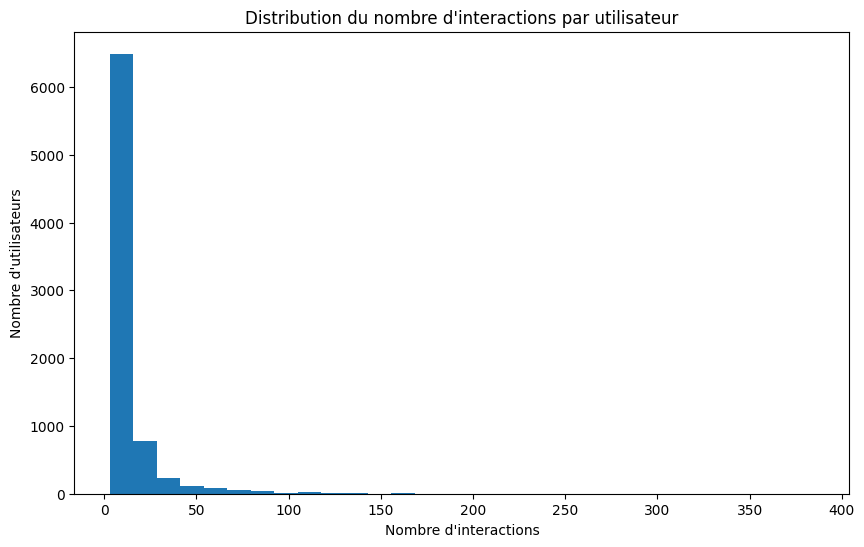

In [12]:
#Distribution des interactions par utilisateurs
import matplotlib.pyplot as plt

# Compter le nombre d'interactions par utilisateur
user_interactions_count = df_interactions_train['u'].value_counts()

# Visualiser la distribution des interactions par utilisateur
plt.figure(figsize=(10, 6))
user_interactions_count.plot(kind='hist', bins=30)
plt.title("Distribution du nombre d'interactions par utilisateur")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

In [13]:
# Interprétation :
# Ce graphique montre que la majorité des utilisateurs ont un nombre limité d'interactions, avec une forte concentration en dessous de 50 interactions.
# Quelques utilisateurs sont nettement plus actifs, avec des interactions dépassant les 300.
# Cette distribution de longue traîne suggère que la plupart des utilisateurs sont peu actifs, ce qui pourrait influencer le choix d'algorithmes de recommandation en tenant compte des besoins des utilisateurs moins fréquents.

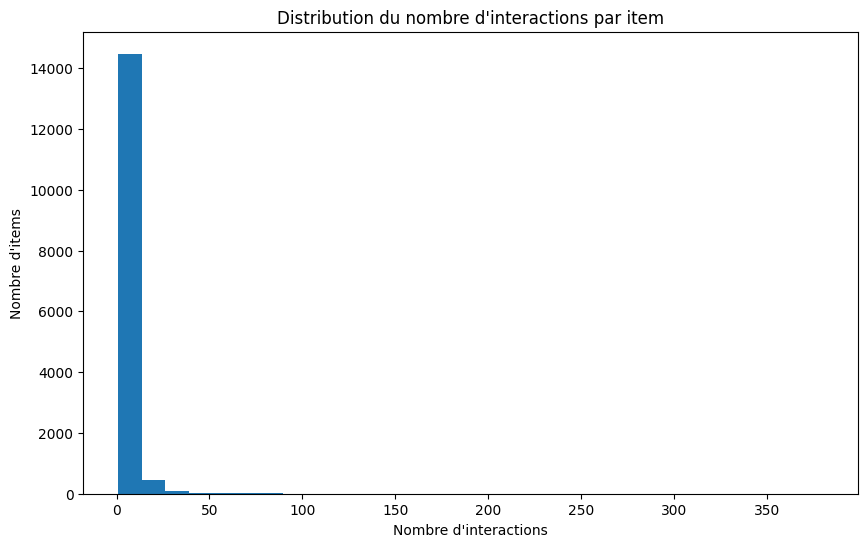

In [14]:
#Distribution des interactions par item
# Compter le nombre d'interactions par item
item_interactions_count = df_interactions_train['i'].value_counts()

# Visualiser la distribution des interactions par item
plt.figure(figsize=(10, 6))
item_interactions_count.plot(kind='hist', bins=30)
plt.title("Distribution du nombre d'interactions par item")
plt.xlabel("Nombre d'interactions")
plt.ylabel("Nombre d'items")
plt.show()

In [15]:
# Interprétation :
# Ce graphique montre que la plupart des items (livres) ont très peu d'interactions, tandis que quelques-uns sont beaucoup plus populaires, avec des pics allant jusqu'à plus de 300 interactions.
# Cela indique une distribution typique de longue traîne, où une minorité d'items attire la majorité des interactions.
# Ce phénomène est important pour le modèle de recommandation, car il faudra adapter les algorithmes pour bien gérer la rareté des interactions.

Analyse des sujets et auteurs dans le dataset des items





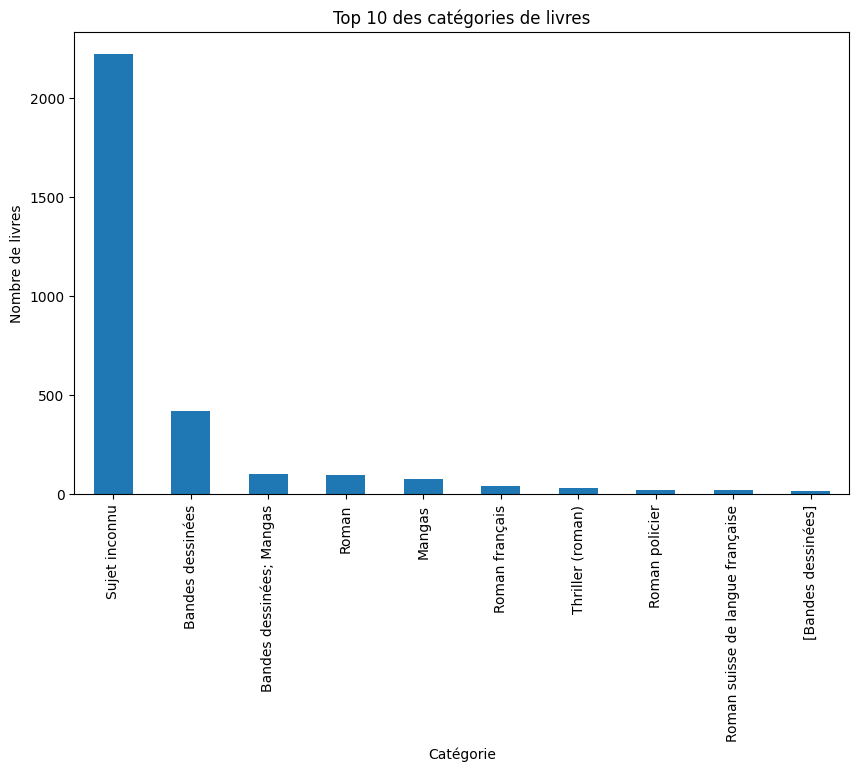

In [16]:
#Analyse des catégories de livres

# Vérifier la présence de la colonne 'Subjects' et analyser les catégories
if 'Subjects' in df_items.columns:
    # Compter les catégories les plus fréquentes
    subjects_counts = df_items['Subjects'].value_counts().head(10)

    # Visualiser les catégories les plus fréquentes
    plt.figure(figsize=(10, 6))
    subjects_counts.plot(kind='bar')
    plt.title("Top 10 des catégories de livres")
    plt.xlabel("Catégorie")
    plt.ylabel("Nombre de livres")
    plt.show()

    # Interprétation :
    # Ce graphique montre les 10 catégories de livres les plus populaires. Ces informations peuvent aider
    # à identifier les sujets d'intérêt pour les utilisateurs et à ajuster le modèle en conséquence.
else:
    print("La colonne 'Subjects' n'est pas présente dans le dataset des items.")

In [17]:
# Interprétation :
# Les bandes dessinées dominent avec environ 400 livres, suivies des mangas à environ 100 livres.
# Cette popularité des catégories pourrait influencer les recommandations, car il serait pertinent de prioriser ces genres pour les utilisateurs intéressés.
# La distribution montre une préférence pour des genres spécifiques, ce qui est utile pour construire des filtres basés sur les préférences des utilisateurs.

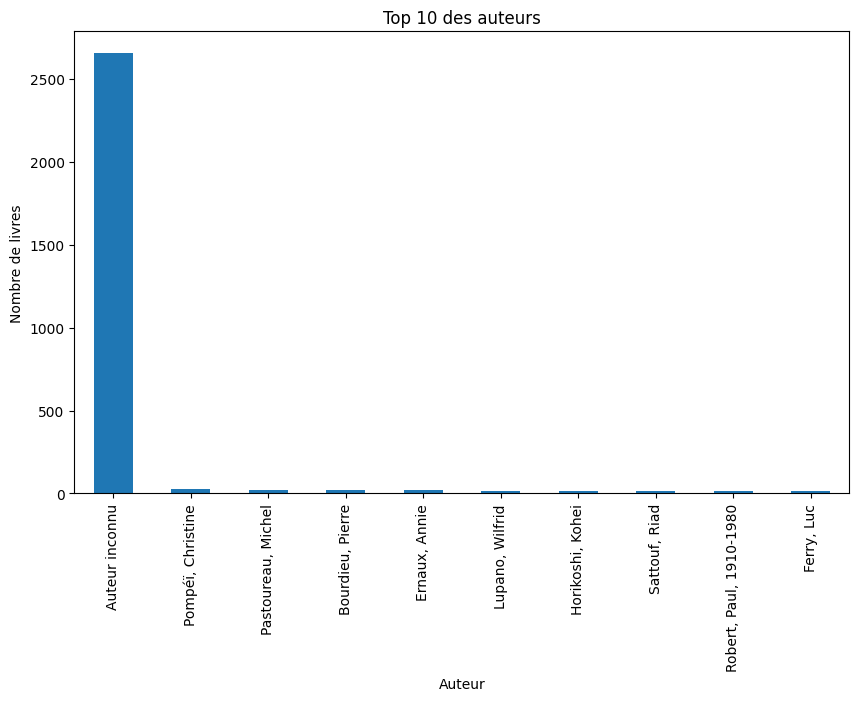

In [18]:
#Analyse des auteurs

# Vérifier la présence de la colonne 'Author' et analyser les auteurs
if 'Author' in df_items.columns:
    # Compter les auteurs les plus fréquents
    author_counts = df_items['Author'].value_counts().head(10)

    # Visualiser les auteurs les plus fréquents
    plt.figure(figsize=(10, 6))
    author_counts.plot(kind='bar')
    plt.title("Top 10 des auteurs")
    plt.xlabel("Auteur")
    plt.ylabel("Nombre de livres")
    plt.show()

    # Interprétation :
    # Ce graphique montre les 10 auteurs les plus représentés dans le dataset.
    # Cela peut indiquer une préférence pour certains auteurs et pourrait influencer les recommandations
    # pour les utilisateurs qui suivent des auteurs spécifiques.
else:
    print("La colonne 'Author' n'est pas présente dans le dataset des items.")

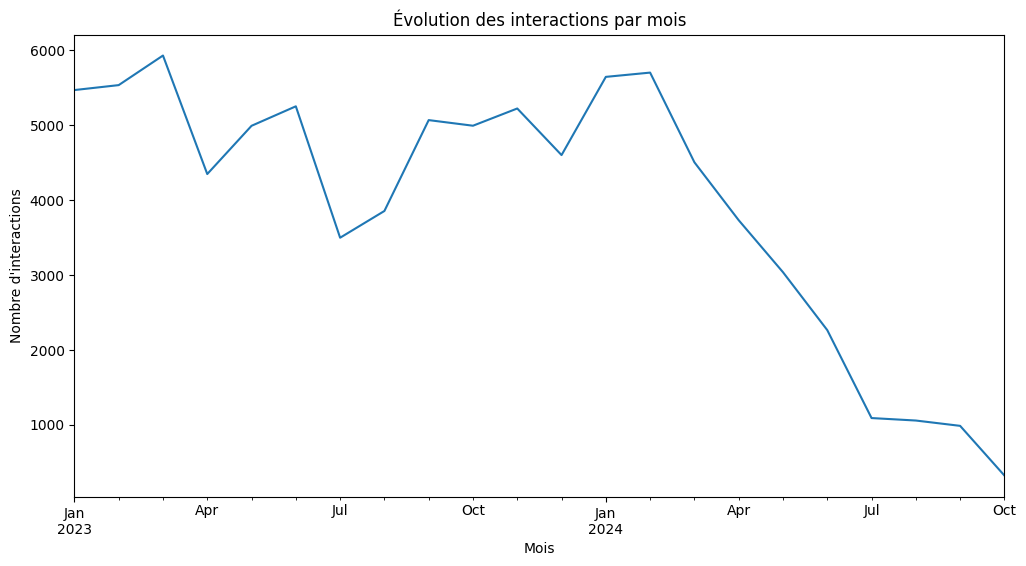

In [21]:
# Analyse temporelle des interactions (est ce qu'il y a des tendances saisonnières ou des pics d'activités?)

# Visualiser la distribution des interactions au fil du temps
df_interactions_train['datetime'].groupby(df_interactions_train['datetime'].dt.to_period("M")).count().plot(kind='line', figsize=(12, 6))
plt.title("Évolution des interactions par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'interactions")
plt.show()

# Interprétation :
# Ce graphique montre l'évolution des interactions par mois. Les pics ou tendances spécifiques au fil du temps
# pourraient révéler des périodes de haute activité, utiles pour comprendre le comportement des utilisateurs
# et ajuster les recommandations en fonction de la saisonnalité.

In [22]:
# Interprétation :
# Ce graphique montre une baisse progressive des interactions sur la période affichée, avec des pics d'activité autour de janvier et octobre 2023 et une forte diminution ensuite.
# Cette tendance pourrait refléter des changements saisonniers ou des événements spécifiques qui influencent l’utilisation de la bibliothèque.
# Cela pourrait également signifier une diminution de l'engagement des utilisateurs avec le temps, un facteur à prendre en compte dans les recommandations.

# 3. Dataset splitting


In [45]:
df_interactions = df_interactions_train.sort_values(["u", "datetime"])
df_interactions.head(10)

,u,i,datetime,user_id_encoded,item_id_encoded
21035,0,0,2023-03-30 15:44:30,0,0
28842,0,1,2023-04-06 12:13:54,0,1
3958,0,2,2023-04-06 17:15:08,0,2
29592,0,3,2023-05-10 10:35:45,0,3
6371,0,3,2023-05-10 10:35:50,0,3
41220,0,4,2023-06-12 11:20:35,0,4
12217,0,5,2023-06-17 14:59:04,0,5
19703,0,6,2023-06-17 14:59:24,0,6
64522,0,7,2023-06-17 14:59:31,0,7
29380,0,8,2023-06-20 11:21:46,0,8


In [46]:
# Calculer le rang en pourcentage des interactions pour chaque utilisateur
df_interactions["pct_rank"] = df_interactions.groupby("u")["datetime"].rank(pct=True, method='dense')
df_interactions.reset_index(drop=True, inplace=True)
df_interactions.head(10)

,u,i,datetime,user_id_encoded,item_id_encoded,pct_rank
0,0,0,2023-03-30 15:44:30,0,0,0.04
1,0,1,2023-04-06 12:13:54,0,1,0.08
2,0,2,2023-04-06 17:15:08,0,2,0.12
3,0,3,2023-05-10 10:35:45,0,3,0.16
4,0,3,2023-05-10 10:35:50,0,3,0.20
5,0,4,2023-06-12 11:20:35,0,4,0.24
6,0,5,2023-06-17 14:59:04,0,5,0.28
7,0,6,2023-06-17 14:59:24,0,6,0.32
8,0,7,2023-06-17 14:59:31,0,7,0.36
9,0,8,2023-06-20 11:21:46,0,8,0.40


In [47]:
# Créer les ensembles d’entraînement et de test
train_data = df_interactions[df_interactions["pct_rank"] < 0.8]
test_data = df_interactions[df_interactions["pct_rank"] >= 0.8]

# Afficher les tailles des ensembles
print("Training set size:", train_data.shape[0])
print("Testing set size:", test_data.shape[0])

Training set size: 65417
Testing set size: 21628


# 3. Pré-traitement des données:


Creation de la matrice utilisateur-item:

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialiser les encodeurs
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# Appliquer les encodages et créer de nouvelles colonnes pour les utilisateurs et les items encodés
df_interactions_train['user_id_encoded'] = user_encoder.fit_transform(df_interactions_train['u'])
df_interactions_train['item_id_encoded'] = item_encoder.fit_transform(df_interactions_train['i'])

# Vérification des nouvelles colonnes encodées
print(df_interactions_train[['u', 'user_id_encoded', 'i', 'item_id_encoded']].head())

      u  user_id_encoded      i  item_id_encoded
0  4456             4456   8581             8509
1   142              142   1964             1944
2   362              362   3705             3677
3  1809             1809  11317            11216
4  4384             4384   1323             1306


Matrice utilisateur - item :

In [25]:
import numpy as np
import pandas as pd

# Créer la matrice utilisateur-item avec des interactions binaires (1 pour une interaction, 0 pour aucune interaction)
user_item_matrix = pd.pivot_table(
    df_interactions_train,
    index='user_id_encoded',
    columns='item_id_encoded',
    values='datetime',
    aggfunc=lambda x: 1,
    fill_value=0
)

# Vérification de la matrice
print("Matrice utilisateur-item :")
print(user_item_matrix.shape)
print(user_item_matrix.head())

Matrice utilisateur-item :
(7838, 15109)
item_id_encoded  0      1      2      3      4      5      6      7      \
user_id_encoded                                                           
0                    1      1      1      1      1      1      1      1   
1                    0      0      0      0      0      0      0      0   
2                    0      0      0      0      0      0      0      0   
3                    0      0      0      0      0      0      0      0   
4                    0      0      0      0      0      0      0      0   

item_id_encoded  8      9      ...  15099  15100  15101  15102  15103  15104  \
user_id_encoded                ...                                             
0                    1      1  ...      0      0      0      0      0      0   
1                    0      0  ...      0      0      0      0      0      0   
2                    0      0  ...      0      0      0      0      0      0   
3                    0      0  ..

# 3.1 Filtrage collaboratif

Calcul de la similarité entre item:

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Calcul de la similarité entre items en utilisant la similarité cosinus
item_similarity_matrix = cosine_similarity(user_item_matrix.T)

# Transformer en DataFrame pour plus de lisibilité
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Afficher un aperçu de la matrice de similarité entre items
print("Matrice de similarité entre items :")
print(item_similarity_df.head())

Matrice de similarité entre items :
item_id_encoded     0         1         2         3         4         5      \
item_id_encoded                                                               
0                1.000000  0.408248  0.333333  0.258199  0.105409  0.204124   
1                0.408248  1.000000  0.408248  0.316228  0.129099  0.250000   
2                0.333333  0.408248  1.000000  0.258199  0.105409  0.204124   
3                0.258199  0.316228  0.258199  1.000000  0.081650  0.158114   
4                0.105409  0.129099  0.105409  0.081650  1.000000  0.064550   

item_id_encoded     6         7         8         9      ...  15099  15100  \
item_id_encoded                                          ...                 
0                0.258199  0.258199  0.192450  0.204124  ...    0.0    0.0   
1                0.316228  0.316228  0.235702  0.250000  ...    0.0    0.0   
2                0.258199  0.258199  0.192450  0.204124  ...    0.0    0.0   
3                0.2

Fonction de recommandation basée sur le filtrage collaboratif item-item


In [44]:
import numpy as np

def recommend_items(user_id, user_item_matrix, item_similarity_df, top_k=10):
    # Récupérer les interactions de l'utilisateur dans la matrice utilisateur-item
    user_interactions = user_item_matrix.loc[user_id]

    # Calculer le score pour chaque item en utilisant la similarité et les interactions de l'utilisateur
    item_scores = user_interactions.dot(item_similarity_df)

    # Filtrer les items que l'utilisateur a déjà vus
    item_scores = item_scores * (1 - user_interactions)

    # Trier les scores des items et sélectionner les top_k items
    recommended_items = item_scores.nlargest(top_k).index.tolist()

    return recommended_items

# Exemple de recommandations pour un utilisateur
user_id = 0  # Remplace par un ID d'utilisateur pour tester
recommended_items = recommend_items(user_id, user_item_matrix, item_similarity_df, top_k=10)
print(f"Items recommandés pour l'utilisateur {user_id}: {recommended_items}")

Items recommandés pour l'utilisateur 0: [1257, 8435, 8928, 8934, 8943, 8931, 8926, 1415, 454, 1166]


Fonction de recommendation utilisateur - utilisateur :

In [28]:
# Calcul de la similarité entre utilisateurs en utilisant la similarité cosinus
user_similarity_matrix = cosine_similarity(user_item_matrix)

# Transformer en DataFrame pour une meilleure lisibilité
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# Afficher un aperçu de la matrice de similarité entre utilisateurs
print("Matrice de similarité entre utilisateurs :")
print(user_similarity_df.head())

Matrice de similarité entre utilisateurs :
user_id_encoded  0     1     2     3     4     5     6     7     8     9     \
user_id_encoded                                                               
0                 1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1                 0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2                 0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3                 0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
4                 0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

user_id_encoded  ...  7828  7829  7830  7831  7832  7833  7834  7835  7836  \
user_id_encoded  ...                                                         
0                ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1                ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2                ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3            

In [29]:
def recommend_items_user_based(user_id, user_item_matrix, user_similarity_df, top_k=10):
    # Récupérer la similarité entre l'utilisateur cible et tous les autres utilisateurs
    similar_users = user_similarity_df[user_id]

    # Calculer les scores pour chaque item en pondérant les interactions par la similarité avec les utilisateurs similaires
    item_scores = similar_users.dot(user_item_matrix)

    # Filtrer les items que l'utilisateur a déjà vus
    user_interactions = user_item_matrix.loc[user_id]
    item_scores = item_scores * (1 - user_interactions)

    # Trier les scores des items et sélectionner les top_k items
    recommended_items = item_scores.nlargest(top_k).index.tolist()

    return recommended_items

# Exemple de recommandations pour un utilisateur
user_id = 0  # Remplace par un ID d'utilisateur pour tester
recommended_items_user_based = recommend_items_user_based(user_id, user_item_matrix, user_similarity_df, top_k=10)
print(f"Items recommandés pour l'utilisateur {user_id} (basé sur similarité utilisateur-utilisateur): {recommended_items_user_based}")

Items recommandés pour l'utilisateur 0 (basé sur similarité utilisateur-utilisateur): [601, 9671, 8028, 13191, 464, 783, 2121, 46, 3781, 9006]


# Calcul précison et recall:

Evalutation des modèles:

2. Data cleaning : Address any missing or inconsistent data. Consider handling outliers, duplicates, or irrelevant records (e.g., users with too few rentals).

3. Additional features: genre frequency, author popularity and book ratings. Perform exploratory data analysis (EDA) to understand patterns, such as book popularity trends.

4. Modeling and recommendations techniques :
  4.1 Collaborative filtering
User-User CF: Recommend books based on similarity between users with similar rental histories.

Item-Item CF: Recommend books similar to items a user has previously rented.

Implement both techniques and evaluate them using the Precision@10 and Recall@10 metrics.

4.2 Content based filtering: Use metadata, such as book title, author, and genre, to create text embeddings (e.g., using BERT or OpenAI models). This approach can recommend items similar to the ones a user has rented.

4.3 Hyybrid approach: Combine collaborative and content-based methods to improve recommendations by balancing personalization with general popularity.

5. Data Augmentation

  5.1 integrate external Data: Use APIs like Google Books to enrich metadata (e.g., book synopsis, reviews, and author background). This can improve the model’s understanding of items.

  5.2 Embeddings Initialization: Use augmented metadata to create embeddings for each book, enhancing item representations in your model.